In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/amazon_reviews (1).txt', sep='\t')  # Use the correct delimiter
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,DOC_ID,RATING
count,21000.000000,21000.000000
mean,10500.500000,4.127952
std,6062.322162,1.278333
min,1.000000,1.000000
25%,5250.750000,4.000000
50%,10500.500000,5.000000
75%,15750.250000,5.000000
max,21000.000000,5.000000


In [ ]:
df['RATING'].value_counts()

5    12210
4     3973
3     1868
1     1757
2     1192
Name: RATING, dtype: int64

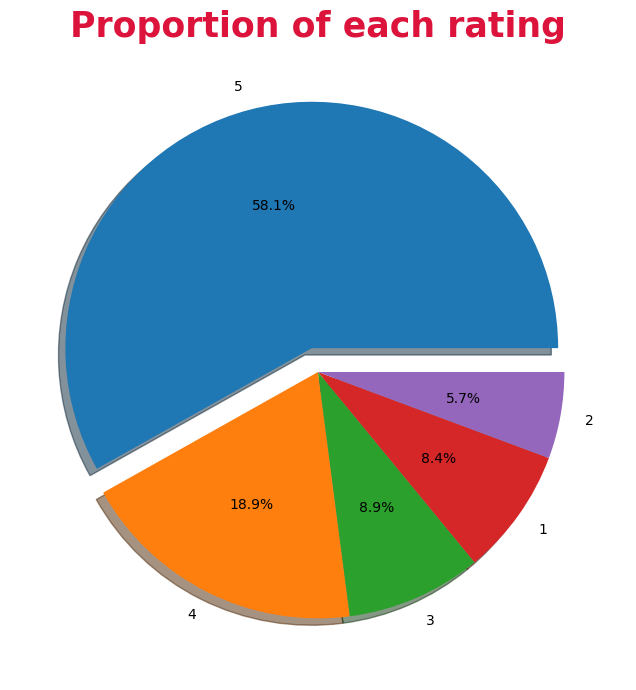

In [ ]:
plt.figure(figsize=(15,8))
labels = df['RATING'].value_counts().keys()
values = df['RATING'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()


In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['REVIEW_TEXT'][0], clean_text(df['REVIEW_TEXT'][0])

('When least you think so, this product will save the day. Just keep it around just in case you need it for something.',
 'least think product save day keep around case need something')

In [ ]:
df['REVIEW_TEXT'].head().apply(clean_text)

0    least think product save day keep around case ...
1    Lithium batteries something new introduced mar...
2    purchased swing baby 6 months pretty much grow...
3    looking inexpensive desk calcolatur works ever...
4    use twice week results great used teeth whiten...
Name: REVIEW_TEXT, dtype: object

In [ ]:
df.shape

(21000, 9)

In [ ]:
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].astype(str)

In [ ]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    additional_chars = set(string.punctuation)

    words = word_tokenize(text)

    filtered_words = [word for word in words if word.lower() not in stop_words and not word.isdigit() and word not in additional_chars]

    processed_text = ' '.join(filtered_words)

    return processed_text


In [ ]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocess(df['REVIEW_TEXT'][4])

'use twice week results great used teeth whitening solutions results would use least three times week keep using potency solution also technique trays keeps everything teeth mouth'

In [ ]:
df['REVIEW_TEXT'][:10000] = df['REVIEW_TEXT'][:10000].apply(preprocess)

In [ ]:
df['REVIEW_TEXT'][10001:20000] = df['REVIEW_TEXT'][10001:20000].apply(preprocess)


In [ ]:
df['REVIEW_TEXT'][20001:30000] = df['REVIEW_TEXT'][20001:30000].apply(preprocess)

In [ ]:
processed_text = df['REVIEW_TEXT'][30001:40000].apply(preprocess)

In [ ]:
processed_text = df['REVIEW_TEXT'][40001:40432].apply(preprocess)

In [ ]:
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["REVIEW_TEXT"] = df["REVIEW_TEXT"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['REVIEW_TEXT'].head()

0    least think product save day keep around case ...
1    lithium batteri someth new introduc market ave...
2    purchas swing babi month pretti much grown lou...
3    look inexpens desk calcolatur work everyth nee...
4    use twice week result great use teeth whiten s...
Name: REVIEW_TEXT, dtype: object

In [ ]:
df.to_csv('/content/amazon_reviews (1).txt', index=False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df.to_csv('/content/amazon_reviews (1).txt', index=False)
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,least think product save day keep around case ...
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,lithium batteri someth new introduc market ave...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,purchas swing babi month pretti much grown lou...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,look inexpens desk calcolatur work everyth nee...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,use twice week result great use teeth whiten s...


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['REVIEW_TEXT'].apply(len)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
 9   length             21000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.6+ MB


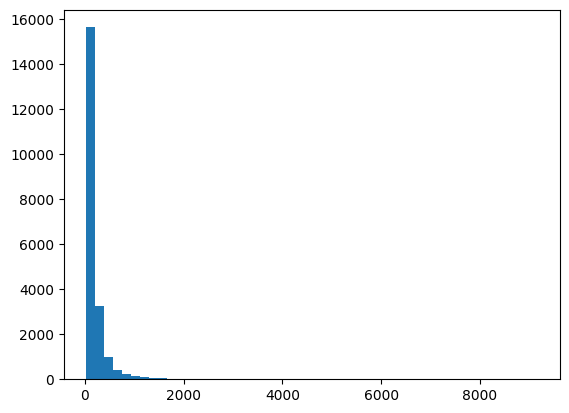

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

In [ ]:
df.groupby('LABEL').describe()

DOC_ID                                                    \
              count     mean          std      min       25%      50%   
LABEL                                                                   
__label1__  10500.0   5250.5  3031.233247      1.0   2625.75   5250.5   
__label2__  10500.0  15750.5  3031.233247  10501.0  13125.75  15750.5   

                                RATING            ...             length  \
                 75%      max    count      mean  ...  75%  max    count   
LABEL                                             ...                      
__label1__   7875.25  10500.0  10500.0  4.115429  ...  5.0  5.0  10500.0   
__label2__  18375.25  21000.0  10500.0  4.140476  ...  5.0  5.0  10500.0   

                                                                      
                  mean         std   min   25%    50%    75%     max  
LABEL                                                                 
__label1__  176.160952  186.142854  30.0  92.0  128.0  190.0  4778.0  
__label2__  240.148762  341.124391  36.0  83.0  133.0  256.0  9157.0  

[2 rows x 24 columns]

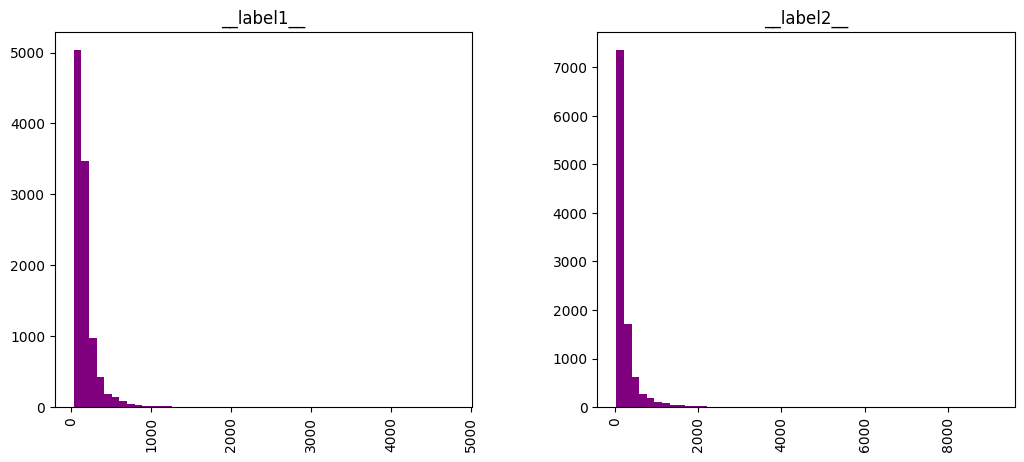

In [ ]:
df.hist(column='length',by='LABEL',bins=50,color='purple',figsize=(12,5))
plt.show()

In [ ]:
filtered_df = df[df['LABEL']=='OR'][['REVIEW_TEXT', 'length']].sort_values(by='length', ascending=False).head()

# Check if there are any rows in the filtered_df
if not filtered_df.empty:
    first_row_text = filtered_df.iloc[0].REVIEW_TEXT
    print(first_row_text)
else:
    print("No rows in the result.")


No rows in the result.


In [ ]:
df.length.describe()

count    21000.000000
mean       208.154857
std        276.636167
min         30.000000
25%         87.000000
50%        130.000000
75%        216.000000
max       9157.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)

In [ ]:
bow_transformer.fit(df['REVIEW_TEXT'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 29739


In [ ]:
review4 = df['REVIEW_TEXT'][3]
review4

'look inexpens desk calcolatur work everyth need issu tilt slightli one side hit key rock littl bit big deal'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 4217)	1
  (0, 4312)	1
  (0, 5217)	1
  (0, 7732)	1
  (0, 8049)	1
  (0, 9763)	1
  (0, 13026)	1
  (0, 13769)	1
  (0, 14197)	1
  (0, 14756)	1
  (0, 15654)	1
  (0, 15780)	1
  (0, 17787)	1
  (0, 18620)	1
  (0, 22274)	1
  (0, 23634)	1
  (0, 23944)	1
  (0, 26379)	1
  (0, 29034)	1
(1, 29739)


In [ ]:
# Assuming 'bow_transformer' is your CountVectorizer object
feature_names = bow_transformer.get_feature_names_out()

# Access specific feature names by index
print(feature_names[15841])
print(feature_names[23848])


loudly
skinnydip


In [ ]:
bow_reviews = bow_transformer.transform(df['REVIEW_TEXT'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (21000, 29739)
Amount of non zero values in the bag of words model: 595238


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.1


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 4217)	1
  (0, 4312)	1
  (0, 5217)	1
  (0, 7732)	1
  (0, 8049)	1
  (0, 9763)	1
  (0, 13026)	1
  (0, 13769)	1
  (0, 14197)	1
  (0, 14756)	1
  (0, 15654)	1
  (0, 15780)	1
  (0, 17787)	1
  (0, 18620)	1
  (0, 22274)	1
  (0, 23634)	1
  (0, 23944)	1
  (0, 26379)	1
  (0, 29034)	1


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

9.160565865391373
4.394127531807159


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (21000, 29739)
No. of Dimensions: 2


**CREATING TRAINING AND TESTING DATA**

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(df['REVIEW_TEXT'],df['LABEL'],test_size=0.2)

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

**Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data**

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(review_test)
predictions

array(['__label2__', '__label2__', '__label1__', ..., '__label2__',
       '__label1__', '__label1__'], dtype='<U10')

In [ ]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

  __label1__       0.63      0.68      0.65      2103
  __label2__       0.65      0.60      0.62      2097

    accuracy                           0.64      4200
   macro avg       0.64      0.64      0.64      4200
weighted avg       0.64      0.64      0.64      4200

Confusion Matrix: [[1425  678]
 [ 843 1254]]
Accuracy Score: 0.6378571428571429


In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 63.79%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['__label2__', '__label2__', '__label1__', ..., '__label1__',
       '__label2__', '__label1__'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

  __label1__       0.63      0.69      0.66      2103
  __label2__       0.65      0.60      0.62      2097

    accuracy                           0.64      4200
   macro avg       0.64      0.64      0.64      4200
weighted avg       0.64      0.64      0.64      4200

Confusion Matrix: [[1442  661]
 [ 846 1251]]
Accuracy Score: 0.6411904761904762
Model Prediction Accuracy: 64.12%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['__label2__', '__label2__', '__label2__', ..., '__label1__',
       '__label1__', '__label2__'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

  __label1__       0.56      0.57      0.56      2103
  __label2__       0.56      0.55      0.56      2097

    accuracy                           0.56      4200
   macro avg       0.56      0.56      0.56      4200
weighted avg       0.56      0.56      0.56      4200

Confusion Matrix: [[1190  913]
 [ 934 1163]]
Accuracy Score: 0.5602380952380952
Model Prediction Accuracy: 56.02%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['__label2__', '__label1__', '__label1__', ..., '__label2__',
       '__label1__', '__label1__'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

  __label1__       0.54      0.82      0.65      2103
  __label2__       0.61      0.29      0.39      2097

    accuracy                           0.55      4200
   macro avg       0.58      0.55      0.52      4200
weighted avg       0.58      0.55      0.52      4200

Confusion Matrix: [[1724  379]
 [1492  605]]
Accuracy Score: 0.5545238095238095
Model Prediction Accuracy: 55.45%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['__label2__', '__label2__', '__label1__', ..., '__label2__',
       '__label1__', '__label1__'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

  __label1__       0.66      0.64      0.65      2103
  __label2__       0.65      0.67      0.66      2097

    accuracy                           0.66      4200
   macro avg       0.66      0.66      0.66      4200
weighted avg       0.66      0.66      0.66      4200

Confusion Matrix: [[1352  751]
 [ 695 1402]]
Accuracy Score: 0.6557142857142857
Model Prediction Accuracy: 65.57%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x78e3784556c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['__label2__', '__label2__', '__label1__', ..., '__label2__',
       '__label1__', '__label1__'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

  __label1__       0.66      0.65      0.65      2103
  __label2__       0.65      0.66      0.65      2097

    accuracy                           0.65      4200
   macro avg       0.65      0.65      0.65      4200
weighted avg       0.65      0.65      0.65      4200

Confusion Matrix: [[1358  745]
 [ 714 1383]]
Accuracy Score: 0.6526190476190477
Model Prediction Accuracy: 65.26%


**CONCLUSION**

In [ ]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 65.26%
K Nearest Neighbors Prediction Accuracy: 55.45%
Decision Tree Classifier Prediction Accuracy: 56.02%
Random Forests Classifier Prediction Accuracy: 64.12%
Support Vector Machines Prediction Accuracy: 65.57%
Multinomial Naive Bayes Prediction Accuracy: 63.79%
